In [7]:
import re
import csv
import time
import pandas as pd
import matplotlib.pyplot as plt
import MeCab
import random
import codecs
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

とりあえず、ファイル名のみのリスト作成

In [2]:
import os

path = "./test_童話"

files = os.listdir(path)
print(type(files))  # <class 'list'>
print(files)        # ['dir1', 'dir2', 'file1', 'file2.txt', 'file3.jpg']

print(files[0])
print(type(files[0]))

<class 'list'>
['年をとったライオンとキツネの話.txt', 'かぐや姫.txt', '.DS_Store', 'うらしまたろう.txt', 'かさじぞう.txt', 'つるのおんがえし.txt']
年をとったライオンとキツネの話.txt
<class 'str'>


In [3]:
file_name = []

for p in files:
    name = os.path.splitext(os.path.basename(p))[0]
    file_name.append(name)

print(file_name)

['年をとったライオンとキツネの話', 'かぐや姫', '.DS_Store', 'うらしまたろう', 'かさじぞう', 'つるのおんがえし']


In [4]:
story = []

for i in file_name:
    with open("童話/"+i+".txt", 'r') as f:
        kw_list = f.read().split("\n")
        #print(kw_list)
    test_str ="".join(kw_list)
    story.append(test_str)
print(story[0])

FileNotFoundError: [Errno 2] No such file or directory: '童話/.DS_Store.txt'

In [5]:
tagger = MeCab.Tagger('-Owakati')

corpus = [tagger.parse(line).strip() for line in story]
#print(corpus)

vectorizer = CountVectorizer(token_pattern=u'(?u)\\b\\w+\\b')
#print(vectorizer)

tf = vectorizer.fit_transform(corpus)

# 分かち書きした単語を表示
print(vectorizer.get_feature_names())
# 単語の出現箇所
print(tf.toarray())

['あげ', 'あたる', 'あな', 'あの', 'あり', 'ありがとう', 'ある', 'い', 'いう', 'いき', 'いっ', 'いつ', 'いつも', 'いる', 'う', 'うつくし', 'お', 'おおい', 'おじいさん', 'おばあさん', 'おや', 'おり', 'お金', 'か', 'かい', 'かぐ', 'かけ', 'かご', 'から', 'かわいがっ', 'が', 'き', 'きっと', 'きつね', 'くれ', 'こと', 'これから', 'さ', 'さようなら', 'ざる', 'し', 'しまい', 'すくすくと', 'すぐ', 'する', 'そう', 'その', 'それから', 'そんな', 'そんなに', 'ぞ', 'た', 'たく', 'たくさん', 'たずねる', 'たち', 'たび', 'だ', 'だろ', 'つれ', 'て', 'で', 'でき', 'でし', 'です', 'と', 'という', 'ところ', 'とっ', 'とても', 'とる', 'とれ', 'どう', 'どうか', 'どうして', 'な', 'ない', 'なか', 'なかっ', 'なく', 'なけれ', 'なっ', 'なり', 'に', 'ね', 'の', 'ので', 'のぼっ', 'は', 'ば', 'ぴかぴか', 'ふけり', 'ふり', 'へ', 'ほら', 'まえ', 'まし', 'ませ', 'まで', 'みる', 'みんな', 'むかえ', 'むかし', 'めがけ', 'も', 'もうすぐ', 'もっ', 'もの', 'や', 'やさしい', 'やってき', 'やって来', 'やとっ', 'やる', 'よ', 'よう', 'を', 'ん', 'キツネ', 'ライオン', '一', '一斉', '上がっ', '不思議', '中', '人', '住ん', '何と', '作っ', '偽物', '僕', '元気', '光', '光っ', '光り', '入っ', '入ら', '具合', '出', '切っ', '切り', '別れ', '力', '動物', '名づけ', '君', '困る', '声', '外', '夜', '大切', '天', '天使', '失い', '女', '女の子', '姫', '娘', '子供', '守ろ', '宝物', '家', 

In [6]:
tf_vec = vectorizer.fit_transform(corpus).toarray()

features = vectorizer.get_feature_names()
print("features:\n{}".format(features))
print("tf:\n{}".format(tf_vec))

tfidf_transformer = TfidfTransformer(norm='l2', sublinear_tf=True)

idf = tfidf_transformer.fit(tf_vec)

print("idf:\n{}".format(idf.idf_))

tfidf = tfidf_transformer.fit_transform(tf_vec)

print("tfidf:\n{}".format(tfidf.toarray()))
print(type(tfidf.toarray()))
print(type(tfidf))

features:
['あげ', 'あたる', 'あな', 'あの', 'あり', 'ありがとう', 'ある', 'い', 'いう', 'いき', 'いっ', 'いつ', 'いつも', 'いる', 'う', 'うつくし', 'お', 'おおい', 'おじいさん', 'おばあさん', 'おや', 'おり', 'お金', 'か', 'かい', 'かぐ', 'かけ', 'かご', 'から', 'かわいがっ', 'が', 'き', 'きっと', 'きつね', 'くれ', 'こと', 'これから', 'さ', 'さようなら', 'ざる', 'し', 'しまい', 'すくすくと', 'すぐ', 'する', 'そう', 'その', 'それから', 'そんな', 'そんなに', 'ぞ', 'た', 'たく', 'たくさん', 'たずねる', 'たち', 'たび', 'だ', 'だろ', 'つれ', 'て', 'で', 'でき', 'でし', 'です', 'と', 'という', 'ところ', 'とっ', 'とても', 'とる', 'とれ', 'どう', 'どうか', 'どうして', 'な', 'ない', 'なか', 'なかっ', 'なく', 'なけれ', 'なっ', 'なり', 'に', 'ね', 'の', 'ので', 'のぼっ', 'は', 'ば', 'ぴかぴか', 'ふけり', 'ふり', 'へ', 'ほら', 'まえ', 'まし', 'ませ', 'まで', 'みる', 'みんな', 'むかえ', 'むかし', 'めがけ', 'も', 'もうすぐ', 'もっ', 'もの', 'や', 'やさしい', 'やってき', 'やって来', 'やとっ', 'やる', 'よ', 'よう', 'を', 'ん', 'キツネ', 'ライオン', '一', '一斉', '上がっ', '不思議', '中', '人', '住ん', '何と', '作っ', '偽物', '僕', '元気', '光', '光っ', '光り', '入っ', '入ら', '具合', '出', '切っ', '切り', '別れ', '力', '動物', '名づけ', '君', '困る', '声', '外', '夜', '大切', '天', '天使', '失い', '女', '女の子', '姫', '娘', '子供', '守ろ', '

In [7]:
df = pd.DataFrame( tfidf.toarray(),
                  index = file_name,
                  columns = features
)

df

ValueError: Shape of passed values is (236, 2), indices imply (236, 6)

In [15]:
target_age = [None,1,4,1,4]

In [17]:
df_2 = pd.DataFrame( target_age,
                  index = file_name,
                  columns = ["対象年齢"]
)

df_2

,対象年齢
年をとったライオンとキツネの話,NaN
かぐや姫,1.0
うらしまたろう,4.0
かさじぞう,1.0
つるのおんがえし,4.0


In [25]:
df_concat = pd.concat([df, df_2], axis=1)
df_concat

,7,あきらめ,あけ,あげ,あげる,あたる,あっという間に,あな,あなた,あの,...,頭,顔,飛ん,食べ,馬鹿,高く,魚,鶴,６,対象年齢
年をとったライオンとキツネの話,0.000000,0.000000,0.000000,0.081655,0.000000,0.00000,0.000000,0.241516,0.000000,0.00000,...,0.081655,0.000000,0.000000,0.10121,0.00000,0.000000,0.000000,0.000000,0.000000,NaN
かぐや姫,0.000000,0.000000,0.000000,0.000000,0.000000,0.06001,0.000000,0.000000,0.000000,0.06001,...,0.000000,0.101605,0.000000,0.00000,0.06001,0.048415,0.000000,0.000000,0.000000,1.0
うらしまたろう,0.058526,0.000000,0.000000,0.000000,0.000000,0.00000,0.058526,0.000000,0.099092,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.099092,0.000000,0.000000,4.0
かさじぞう,0.000000,0.068831,0.055532,0.094024,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,...,0.055532,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.068831,1.0
つるのおんがえし,0.000000,0.000000,0.041688,0.000000,0.051671,0.00000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.087486,0.00000,0.00000,0.041688,0.000000,0.180067,0.000000,4.0


再実行はこちら!

In [1]:
import csv

test_story =[]
target_age_test = []

with open('test1.csv') as f:
    reader = csv.reader(f)
    for row in reader:
        test_story.append(row[1])
        if row[2] == '':
            target_age_test.append(None)
        else:
            target_age_test.append(float(row[2]))

target_age_test.pop(0)
print(len(test_story))
print(target_age_test)

101
[None, 4.0, 4.0, 4.0, None, 4.0, None, None, None, None, 1.0, 3.0, 4.0, None, None, 3.5, None, None, None, None, 4.0, None, 4.0, None, None, 3.5, 4.0, None, 4.0, None, None, None, 7.0, None, None, None, 4.5, 4.0, None, 5.0, None, None, 4.0, None, 4.0, None, None, 3.5, 3.0, 3.5, None, 4.0, 4.0, None, 4.0, None, 5.0, 4.5, None, 2.5, 7.0, 4.0, None, None, 4.0, None, 4.0, None, None, None, None, 4.0, None, 4.0, 4.0, None, None, None, 3.0, None, None, None, None, None, 4.0, 4.0, None, 3.0, None, 4.0, None, 4.0, 4.0, 8.0, None, None, None, 4.0, 4.0, None]


In [2]:
import shutil

test_story.pop(0)

for i in test_story:
    shutil.copyfile("./童話/"+i+".txt", "./test/"+i+".txt")

再実行はこちら

In [3]:
import os

path_test = "./test"

files_test = os.listdir(path_test)
print(type(files_test))  # <class 'list'>
print(files_test)        # ['dir1', 'dir2', 'file1', 'file2.txt', 'file3.jpg']

print(files_test[0])
print(len(files_test))

<class 'list'>
['おおきな木とむすめ.txt', 'ももたろう.txt', 'ぶんぶくちゃがま.txt', 'かぜのかみとこども.txt', 'どくめし.txt', 'わらしべちょうじゃ.txt', 'かまいけ.txt', '年をとったライオンとキツネの話.txt', 'ネコがネズミをおいかけるわけ.txt', 'こしおれすずめ.txt', 'びんぼう神とふくの神.txt', 'テングのすもう.txt', 'かぐや姫.txt', 'たからばし.txt', 'はなききおとこ.txt', 'ききみみずきん.txt', 'きんのつばき.txt', 'たのく.txt', 'じゃがいもどろぼう.txt', 'さんねんねたろう.txt', 'あかんぼうをたべた女.txt', 'たからゲタ.txt', 'おにのかいだん.txt', 'きしぼじん.txt', 'タニシちょうじゃ.txt', 'いなばのしろウサギ.txt', 'てんごくののうふ.txt', 'はなさかじいさん.txt', 'うみのみずはなぜしょっぱい.txt', 'たけのこ童女.txt', 'こうぼうのつえ.txt', 'なぞなぞおばけ.txt', 'かためのろうじん.txt', 'こめんぶくあわんぶく.txt', 'かいぞくだったおしょうさん.txt', 'まんじゅうこわい.txt', 'しちふくじん.txt', 'じゅげむ.txt', 'かしこいむすめ.txt', 'あさじがやど.txt', 'ちんもくはカネにあらず.txt', 'ねずみのすもう.txt', 'じゅんめぐり.txt', 'てんぷくちふく.txt', 'おじいさんとひょうたん.txt', 'ぜんいのわ.txt', 'こぶとりじいさん.txt', 'あかたろう.txt', 'こそだてゆうれい.txt', '二くみのりょうしんをもつむすめ.txt', 'ゆきおんな.txt', 'あまのはごろも.txt', 'おきぬ.txt', 'いっすんぼうし.txt', 'てんにのぼったおとこ.txt', 'しあわせのエンドウマメ.txt', 'おにはうち_ふくはそと.txt', 'とっつこうか_ひっつこうか.txt', 'お日さまとお月さま.txt', 'うしわかまる.txt', 'ねずみのよめいり.txt', 'じひのかみさま.txt', 'そそ

In [4]:
file_name_test = []

for p in files_test:
    name = os.path.splitext(os.path.basename(p))[0]
    file_name_test.append(name)

print(file_name_test)

['おおきな木とむすめ', 'ももたろう', 'ぶんぶくちゃがま', 'かぜのかみとこども', 'どくめし', 'わらしべちょうじゃ', 'かまいけ', '年をとったライオンとキツネの話', 'ネコがネズミをおいかけるわけ', 'こしおれすずめ', 'びんぼう神とふくの神', 'テングのすもう', 'かぐや姫', 'たからばし', 'はなききおとこ', 'ききみみずきん', 'きんのつばき', 'たのく', 'じゃがいもどろぼう', 'さんねんねたろう', 'あかんぼうをたべた女', 'たからゲタ', 'おにのかいだん', 'きしぼじん', 'タニシちょうじゃ', 'いなばのしろウサギ', 'てんごくののうふ', 'はなさかじいさん', 'うみのみずはなぜしょっぱい', 'たけのこ童女', 'こうぼうのつえ', 'なぞなぞおばけ', 'かためのろうじん', 'こめんぶくあわんぶく', 'かいぞくだったおしょうさん', 'まんじゅうこわい', 'しちふくじん', 'じゅげむ', 'かしこいむすめ', 'あさじがやど', 'ちんもくはカネにあらず', 'ねずみのすもう', 'じゅんめぐり', 'てんぷくちふく', 'おじいさんとひょうたん', 'ぜんいのわ', 'こぶとりじいさん', 'あかたろう', 'こそだてゆうれい', '二くみのりょうしんをもつむすめ', 'ゆきおんな', 'あまのはごろも', 'おきぬ', 'いっすんぼうし', 'てんにのぼったおとこ', 'しあわせのエンドウマメ', 'おにはうち_ふくはそと', 'とっつこうか_ひっつこうか', 'お日さまとお月さま', 'うしわかまる', 'ねずみのよめいり', 'じひのかみさま', 'そそっかしい_そうべえさん', 'かちかちやま', 'たきばしのだいじゃ', 'うらしまたろう', 'きんびょうぶ', 'しょうじょうじのたぬきばやし', 'カガミのなかのひと', 'くちなしにょうぼう', 'うりこひめ', '三にんのこどもとオニ', 'かさじぞう', 'したきりすずめ', 'つきからのもち', 'ざしきわらし', 'えからぬけでたうま', 'せつぶんのオニ', 'スギの木の男', 'おにかめん', 'かわずにょうぼう', 'あまのいわや', 'うばすてやま', 'てんぐのかくれみの', 'ちからたろう',

In [5]:
story_test = []

for i in files_test:
    with open("test/"+i, 'r') as f:
        kw_list = f.read().split("\n")
        #print(kw_list)
    test_str ="".join(kw_list)
    story_test.append(test_str)
print(story_test[0])

むかし、むかし、ある所に、貧しい娘さんとおばあさんが住んでいました。 娘さんは幼いときに両親を亡くし、朝早くから、夜遅くまで長者さんの家で働いていて、夕飯を毎晩そこでいただき、残りを少しおばあさんに持って帰りました。 ある雨の日、娘さんは家に帰る途中、大きな木の下で雨宿りをすると、その木が娘さんにささやきました。 「娘さん、とても働き者ですね。よく聞きなさい。私は三日後に、領主の命（めい）で木こりにきられて、三ヵ月後大きな船になり海に運ばれます。」 「まあ、かわいそう。」 「しかし、海に入れてるとき、私は決して動きません。たくさんの人が困るでしょうから、あなたが出ていって、『船よ、動け。いっち、にい、さん。』と言いなさい。私は、ゆっくりと海に出て行きます。領主から褒美が沢山もらえるでしょう。」と木が言いました。 大きな木は、三日後本当にきられ、三ヵ月後大きな船になりました。 船を海に入れる日になり、大勢の人が船を海に出そうとしましたが、どんなに一生懸命、何人がかりで押しても、船はびくともしなかったので、領主からお触れが出されました。 『船を海に押し出したものに、褒美を取らせる。』と。 娘さんが申し出ると、みんなが笑って、こう言いました。 「船を動かせるって。大勢の男でも動かないのに。」 「船が動くなら誰でもよい。」と領主が言いました。 大勢の人が見ている中、娘さんは船のへさきに立つと、大声で「船よ、動け。いっち、にい、さん。」と言いました。 何と、船が少しずつ動き出し、海の上に浮かんだではありませんか。 「何と不思議な娘だ。」みんなが、領主も含めて、声を上げました。 「私は、決して不思議ではありません。ただ木が言ったんです・・・」娘は静かに言いました。 「約束どおり、褒美を取らせよう。何が望みだ。遠慮なく言いなさい。」 「私には、六十歳のおばあさんが家におります。貧しくて、米や着物を買うお金がありません。」 「そうか。」と領主。 次の日、領主は、たくさんの米と着物を、娘さんの家に送り、それから娘さんは、おばあさんと幸せに暮らしたとさ。


In [8]:
tagger = MeCab.Tagger('-Owakati')

corpus = [tagger.parse(line).strip() for line in story_test]
#print(corpus)

vectorizer = CountVectorizer(token_pattern=u'(?u)\\b\\w+\\b')
#print(vectorizer)

tf = vectorizer.fit_transform(corpus)

# 分かち書きした単語を表示
print(vectorizer.get_feature_names())
# 単語の出現箇所
print(tf.toarray())

['10', '13', '2', '7', '々', 'ぁ', 'あ', 'ああ', 'あい', 'あいかわら', 'あいかわらず', 'あいだ', 'あいつ', 'あう', 'あか', 'あかし', 'あがり', 'あがりこみ', 'あがる', 'あき', 'あきらめ', 'あきる', 'あきれ', 'あくび', 'あけ', 'あける', 'あげ', 'あげく', 'あげよ', 'あげる', 'あげれ', 'あご', 'あさ', 'あし', 'あした', 'あす', 'あずけ', 'あずけよ', 'あせっ', 'あぜ', 'あそこ', 'あたい', 'あたっ', 'あたり', 'あたりまえ', 'あたる', 'あちこち', 'あちら', 'あっ', 'あったまっ', 'あっち', 'あっと', 'あっという間に', 'あっと言う間に', 'あつい', 'あつめ', 'あて', 'あと', 'あな', 'あなた', 'あの', 'あばれ', 'あばれまわっ', 'あふれ', 'あぶ', 'あぶない', 'あま', 'あまい', 'あまく', 'あまてらす', 'あまり', 'あまりに', 'あめ', 'あやまっ', 'あやまり', 'あやまれ', 'あら', 'あらゆる', 'あらわし', 'あらわれ', 'あり', 'ありがたい', 'ありがたく', 'ありがとう', 'ありとあらゆる', 'ありゃ', 'ある', 'あるい', 'あるじ', 'ある時', 'あれ', 'あろ', 'あわ', 'あわせ', 'あわて', 'あわてふためき', 'あん', 'あんこ', 'あんた', 'あんな', 'あんなに', 'ぃ', 'い', 'いい', 'いいえ', 'いう', 'いえいえ', 'いか', 'いかが', 'いかにも', 'いかほど', 'いき', 'いきおい', 'いきさつ', 'いきなり', 'いく', 'いくつ', 'いくら', 'いけ', 'いける', 'いこ', 'いし', 'いじめ', 'いじめる', 'いじわる', 'いずれ', 'いそい', 'いそがしい', 'いそぐ', 'いたい', 'いたく', 'いたし', 'いたずら', 'いただい', 'いただき', 'いただけ', 'いただけれ', 'いたっ', 'いたん', 'いち', 'いちいち

https://qiita.com/MomonekoView/items/74cf7b72f5303db91c85

を参考に色々やる

In [84]:
print(type(vectorizer.get_feature_names()))

<class 'list'>


In [92]:
print(vectorizer.vocabulary_)

{'むかし': 1801, 'ある': 86, '所': 3433, 'に': 1415, '貧しい': 4798, '娘': 2988, 'さん': 786, 'と': 1243, 'おばあさん': 319, 'が': 498, '住ん': 2362, 'で': 1228, 'い': 102, 'まし': 1725, 'た': 1016, 'は': 1491, '幼い': 3201, 'とき': 1256, '両親': 2248, 'を': 2014, '亡くし': 2289, '朝': 3698, '早くから': 3635, '夜': 2885, '遅く': 4964, 'まで': 1748, '長者': 5049, 'の': 1463, '家': 3043, '働い': 2417, 'て': 1222, '夕飯': 2880, '毎晩': 3860, 'そこ': 970, 'いただき': 134, '残り': 3847, '少し': 3105, '持っ': 3517, '帰り': 3176, '雨': 5110, '日': 3619, '帰る': 3178, '途中': 4937, '大きな': 2898, '木の下': 3705, '雨宿り': 5111, 'する': 927, 'その': 982, '木': 3703, 'ささやき': 745, 'とても': 1274, '働き者': 2422, 'です': 1238, 'ね': 1446, 'よく': 1937, '聞き': 4478, 'なさい': 1368, '私': 4295, '三': 2209, '後': 3280, '領主': 5139, '命': 2749, 'めい': 1814, '木こり': 3704, 'きら': 542, 'れ': 1977, 'ヵ月': 2164, '船': 4541, 'なり': 1394, '海': 3967, '運ば': 4969, 'ます': 1728, 'まあ': 1713, 'かわい': 486, 'そう': 965, 'しかし': 799, '入れ': 2459, 'てる': 1225, '決して': 3909, '動き': 2581, 'ませ': 1733, 'ん': 2015, 'たくさん': 1032, '人': 2297, '困る': 2803

In [87]:
words = vectorizer.get_feature_names()

word_to_id = {}
id_to_word = {}
word_to_id, id_to_word = id_preprocess(words, word_to_id, id_to_word)
print(word_to_id)

{'10': 0, '13': 1, '2': 2, '7': 3, '々': 4, 'ぁ': 5, 'あ': 6, 'ああ': 7, 'あい': 8, 'あいかわら': 9, 'あいかわらず': 10, 'あいだ': 11, 'あいつ': 12, 'あう': 13, 'あか': 14, 'あかし': 15, 'あがり': 16, 'あがりこみ': 17, 'あがる': 18, 'あき': 19, 'あきらめ': 20, 'あきる': 21, 'あきれ': 22, 'あくび': 23, 'あけ': 24, 'あける': 25, 'あげ': 26, 'あげく': 27, 'あげよ': 28, 'あげる': 29, 'あげれ': 30, 'あご': 31, 'あさ': 32, 'あし': 33, 'あした': 34, 'あす': 35, 'あずけ': 36, 'あずけよ': 37, 'あせっ': 38, 'あぜ': 39, 'あそこ': 40, 'あたい': 41, 'あたっ': 42, 'あたり': 43, 'あたりまえ': 44, 'あたる': 45, 'あちこち': 46, 'あちら': 47, 'あっ': 48, 'あったまっ': 49, 'あっち': 50, 'あっと': 51, 'あっという間に': 52, 'あっと言う間に': 53, 'あつい': 54, 'あつめ': 55, 'あて': 56, 'あと': 57, 'あな': 58, 'あなた': 59, 'あの': 60, 'あばれ': 61, 'あばれまわっ': 62, 'あふれ': 63, 'あぶ': 64, 'あぶない': 65, 'あま': 66, 'あまい': 67, 'あまく': 68, 'あまてらす': 69, 'あまり': 70, 'あまりに': 71, 'あめ': 72, 'あやまっ': 73, 'あやまり': 74, 'あやまれ': 75, 'あら': 76, 'あらゆる': 77, 'あらわし': 78, 'あらわれ': 79, 'あり': 80, 'ありがたい': 81, 'ありがたく': 82, 'ありがとう': 83, 'ありとあらゆる': 84, 'ありゃ': 85, 'ある': 86, 'あるい': 87, 'あるじ': 88, 'ある時': 89, 'あれ': 90,

In [88]:
def corpus_preprocess(words, word_to_id, id_to_word):
    corpus = np.array([word_to_id[w] for w in words])
    return corpus

In [89]:
corpus_dic = {}
corpus_dic = corpus_preprocess(words, word_to_id, id_to_word)
print(corpus_dic)

[   0    1    2 ... 5270 5271 5272]


In [9]:
tf_vec = vectorizer.fit_transform(corpus).toarray()

features = vectorizer.get_feature_names()
print("features:\n{}".format(features))
print("tf:\n{}".format(tf_vec))

tfidf_transformer = TfidfTransformer(norm='l2', sublinear_tf=True)

idf = tfidf_transformer.fit(tf_vec)

print("idf:\n{}".format(idf.idf_))

tfidf = tfidf_transformer.fit_transform(tf_vec)

print("tfidf:\n{}".format(tfidf.toarray()))
print(type(tfidf.toarray()))
print(type(tfidf))

features:
['10', '13', '2', '7', '々', 'ぁ', 'あ', 'ああ', 'あい', 'あいかわら', 'あいかわらず', 'あいだ', 'あいつ', 'あう', 'あか', 'あかし', 'あがり', 'あがりこみ', 'あがる', 'あき', 'あきらめ', 'あきる', 'あきれ', 'あくび', 'あけ', 'あける', 'あげ', 'あげく', 'あげよ', 'あげる', 'あげれ', 'あご', 'あさ', 'あし', 'あした', 'あす', 'あずけ', 'あずけよ', 'あせっ', 'あぜ', 'あそこ', 'あたい', 'あたっ', 'あたり', 'あたりまえ', 'あたる', 'あちこち', 'あちら', 'あっ', 'あったまっ', 'あっち', 'あっと', 'あっという間に', 'あっと言う間に', 'あつい', 'あつめ', 'あて', 'あと', 'あな', 'あなた', 'あの', 'あばれ', 'あばれまわっ', 'あふれ', 'あぶ', 'あぶない', 'あま', 'あまい', 'あまく', 'あまてらす', 'あまり', 'あまりに', 'あめ', 'あやまっ', 'あやまり', 'あやまれ', 'あら', 'あらゆる', 'あらわし', 'あらわれ', 'あり', 'ありがたい', 'ありがたく', 'ありがとう', 'ありとあらゆる', 'ありゃ', 'ある', 'あるい', 'あるじ', 'ある時', 'あれ', 'あろ', 'あわ', 'あわせ', 'あわて', 'あわてふためき', 'あん', 'あんこ', 'あんた', 'あんな', 'あんなに', 'ぃ', 'い', 'いい', 'いいえ', 'いう', 'いえいえ', 'いか', 'いかが', 'いかにも', 'いかほど', 'いき', 'いきおい', 'いきさつ', 'いきなり', 'いく', 'いくつ', 'いくら', 'いけ', 'いける', 'いこ', 'いし', 'いじめ', 'いじめる', 'いじわる', 'いずれ', 'いそい', 'いそがしい', 'いそぐ', 'いたい', 'いたく', 'いたし', 'いたずら', 'いただい', 'いただき', 'いただけ', 'いただけれ', 'いたっ', 'いたん', '

In [100]:
U, s, V = np.linalg.svd(tfidf.toarray(), full_matrices=True)
print(U.shape, s.shape, V.shape)
print(U.shape[1], V.shape[0])

(100, 100) (100,) (5273, 5273)
100 5273


In [104]:
# svd
U, S, V = np.linalg.svd(tfidf.toarray())
print('\n# SVD: dense vectors with all singular values')
print(U)

use_s_values = 2
U2 = U[:,0:use_s_values]
print('\n# SVD: dense vectors with singular values = {}'.format(use_s_values))
print(U2)

user_query = "サル"
print('\n# most_similar() with SVD-2')
most_similar(user_query, word_to_id, id_to_word, U2)


# SVD: dense vectors with all singular values
[[-0.10931188 -0.01992731  0.11603693 ...  0.08661003 -0.04404706
   0.00205458]
 [-0.10392913  0.13422259  0.10339465 ... -0.05239152 -0.11249808
   0.01177841]
 [-0.08816223  0.07419666 -0.1716619  ... -0.1752089   0.02441578
  -0.0388495 ]
 ...
 [-0.11491728  0.10818691  0.09368335 ...  0.05220064 -0.02073184
  -0.03570705]
 [-0.09492735  0.25728317  0.03478283 ... -0.02772214  0.07289566
   0.05599773]
 [-0.09982189 -0.08539835  0.1599905  ...  0.05198625  0.12218849
  -0.04170077]]

# SVD: dense vectors with singular values = 2
[[-0.10931188 -0.01992731]
 [-0.10392913  0.13422259]
 [-0.08816223  0.07419666]
 [-0.10594655  0.00343064]
 [-0.11030225 -0.07158133]
 [-0.11412762 -0.05913997]
 [-0.09889344 -0.01305661]
 [-0.08380493  0.09372363]
 [-0.07062408 -0.06256891]
 [-0.09538737  0.19900215]
 [-0.10836273 -0.04247134]
 [-0.10273633 -0.05050108]
 [-0.10597629  0.08673026]
 [-0.1054323  -0.01335686]
 [-0.11041448 -0.10122827]
 [-0.1050

IndexError: index 2074 is out of bounds for axis 0 with size 100

In [10]:
df_test = pd.DataFrame( tfidf.toarray(),
                  index = file_name_test,
                  columns = features
)

df_test

,10,13,2,7,々,ぁ,あ,ああ,あい,あいかわら,...,０,１,１月,２,２つ,３,４,５,６,７
おおきな木とむすめ,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ももたろう,0.0,0.0,0.0,0.0,0.000000,0.0,0.040799,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ぶんぶくちゃがま,0.0,0.0,0.0,0.0,0.000000,0.0,0.045089,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
かぜのかみとこども,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.050211,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
どくめし,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
お月様_お日様_雷様の旅立ち,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
つきみそうのよめ,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
つるのおんがえし,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
おむすびころりん,0.0,0.0,0.0,0.0,0.070353,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:


df_2_test = pd.DataFrame( target_age_test,
                  index = file_name_test,
                  columns = ["対象年齢"]
)

df_2_test

,対象年齢
おおきな木とむすめ,NaN
ももたろう,4.0
ぶんぶくちゃがま,4.0
かぜのかみとこども,4.0
どくめし,NaN
...,...
お月様_お日様_雷様の旅立ち,NaN
つきみそうのよめ,NaN
つるのおんがえし,4.0
おむすびころりん,4.0


In [12]:
df_2_test.fillna(df_2_test.median(),inplace=True)
df_2_test

,対象年齢
おおきな木とむすめ,4.0
ももたろう,4.0
ぶんぶくちゃがま,4.0
かぜのかみとこども,4.0
どくめし,4.0
...,...
お月様_お日様_雷様の旅立ち,4.0
つきみそうのよめ,4.0
つるのおんがえし,4.0
おむすびころりん,4.0


In [19]:
df_concat_test = pd.concat([df_test, df_2_test], axis=1)
df_concat_test

,10,13,2,7,々,ぁ,あ,ああ,あい,あいかわら,...,１,１月,２,２つ,３,４,５,６,７,対象年齢
おおきな木とむすめ,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,4.0
ももたろう,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.040799,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,4.0
ぶんぶくちゃがま,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.045089,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,4.0
かぜのかみとこども,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.050211,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,4.0
どくめし,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,4.0
わらしべちょうじゃ,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,4.0
かまいけ,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.080062,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,4.0
年をとったライオンとキツネの話,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,4.0
ネコがネズミをおいかけるわけ,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,4.0
こしおれすずめ,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,4.0


まともな結果は出ないであろうが取り敢えず動かす(　`・ω・')

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X = df_test
Y = df_2_test

x_train, x_test, y_train, y_test= train_test_split(X,Y,test_size=0.3, random_state=0)

#print("y_train:{}".format(y_train))
#print("y_test :{}".format(y_test))

In [14]:
#y_t = target_age_test

y_t = [4.0 if i == None else i for i in target_age_test]
        
ndarrayY = np.array(y_t)

In [15]:
print(tfidf.toarray().shape)
print(ndarrayY.shape)

(100, 5273)
(100,)


In [16]:
x = tfidf.toarray()
y = ndarrayY
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3, random_state=0)

print("y_train:{}".format(y_train))
print(len(x_train))
print(len(y_train))

print("y_test :{}".format(y_test))
print(len(y_test))

y_train:[7.  4.  4.  4.  4.  4.  4.  5.  4.  4.  4.  4.  4.  4.  4.  3.5 4.  4.
 4.  4.  4.  2.5 4.  4.  4.  4.  3.  4.  4.  4.  1.  4.  4.  4.5 4.  4.
 7.  4.  4.  4.  4.  4.  3.5 4.  4.  4.  4.  4.  4.  4.  3.5 4.  4.  4.
 5.  4.  4.  4.  4.  4.  3.  4.5 4.  4.  4.  4.  4.  4.  3.5 4. ]
70
70
y_test :[4. 4. 4. 4. 4. 8. 4. 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 3. 4. 4. 4. 4.]
30


In [17]:
#Xtrain = np.reshape(x_train, (-1,1))
#Xtest = np.reshape(x_test, (-1,1))
#Xtrain2 = np.array(Xtrain,dtype=int)
#Xtest2 = np.array(Xtest,dtype=int)
y_train2 = np.array(y_train,dtype=int)
y_test2 = np.array(y_test,dtype=int)

#print(Xtrain)

#print(len(x_train))
#print(len(Xtrain))
print(len(y_train2))

70


In [18]:
%%time
import scipy.stats
from sklearn.datasets import load_breast_cancer
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

CPU times: user 21.8 ms, sys: 8.92 ms, total: 30.7 ms
Wall time: 49 ms


In [19]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#ハイパーパラメータを調整しない
model = LinearSVC()
model.fit(x_train, y_train2)
score = model.score(x_test, y_test2)
print("")
print('train:', model.score(x_train, y_train2))
print('test:', model.score(x_test, y_test2))
print("デフォルトスコア:", score)


train: 1.0
test: 0.9
デフォルトスコア: 0.9


In [20]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [21]:
models = {
    'linear': LogisticRegression(),
    'tree': DecisionTreeClassifier(),
    'knn': KNeighborsClassifier(n_neighbors=3),
    'svm': SVC()
}

scores = {}

for name, model in models.items():
  # モデルの構築～評価
  model.fit(x_train, y_train2)
  scores[(name, 'train')] = model.score(x_train, y_train2)
  scores[(name, 'test')] = model.score(x_test, y_test2)
    
pd.Series(scores).unstack()

,test,train
knn,0.900000,0.842857
linear,0.900000,0.828571
svm,0.900000,0.828571
tree,0.766667,1.000000


In [22]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)

print(confusion_matrix(y_test2, y_pred))


[[ 0  2  0]
 [ 0 27  0]
 [ 0  1  0]]


In [39]:
print(x_test[:1]) 

[[0. 0. 0. ... 0. 0. 0.]]


In [23]:
print(x_train.shape)
print(x_test.shape)
print(y_train2.shape)
print(y_test2.shape)

(70, 5273)
(30, 5273)
(70,)
(30,)


In [59]:
from sklearn import linear_model


from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() # 線形重回帰
regressor.fit(x_train, y_train2) # 学習

# Make predictions using the testing set
predicted = regressor.predict(x_test)

# Check the predictions vs true answer
print(np.c_[predicted, y_test2])

[[3.84245137 4.        ]
 [3.79237722 4.        ]
 [4.06951557 4.        ]
 [3.96305543 4.        ]
 [3.86230885 4.        ]
 [3.76411509 8.        ]
 [3.85729587 4.        ]
 [4.2125747  4.        ]
 [4.00761772 4.        ]
 [3.94643366 4.        ]
 [4.05635233 4.        ]
 [3.91064718 4.        ]
 [3.79719912 3.        ]
 [3.95183859 4.        ]
 [4.22267111 4.        ]
 [4.24090517 4.        ]
 [3.92777803 4.        ]
 [4.06151628 4.        ]
 [4.02073182 4.        ]
 [3.75634116 4.        ]
 [4.01887792 4.        ]
 [4.03376981 4.        ]
 [4.0005043  4.        ]
 [3.94566815 4.        ]
 [4.01789291 4.        ]
 [4.0193015  3.        ]
 [3.81902633 4.        ]
 [4.00130288 4.        ]
 [3.98065861 4.        ]
 [3.98931593 4.        ]]


In [33]:
# Check the differences (errors)
print(y_test2 - predicted)

# Check the sum of absolute error
print(sum(np.abs(y_test2 - predicted)))

# MAE (Mean Absolute Error)
print(sum(np.abs(y_test2 - predicted)) / len(x_test))

[ 1.57548628e-01  2.07622779e-01 -6.95155696e-02  3.69445662e-02
  1.37691148e-01  4.23588491e+00  1.42704128e-01 -2.12574703e-01
 -7.61772010e-03  5.35663384e-02 -5.63523320e-02  8.93528166e-02
 -7.97199124e-01  4.81614094e-02 -2.22671113e-01 -2.40905175e-01
  7.22219684e-02 -6.15162811e-02 -2.07318151e-02  2.43658843e-01
 -1.88779222e-02 -3.37698150e-02 -5.04301181e-04  5.43318519e-02
 -1.78929084e-02 -1.01930150e+00  1.80973674e-01 -1.30288092e-03
  1.93413946e-02  1.06840667e-02]
8.471421679286749
0.28238072264289166


予測値のズレがさらに大きくなり、目的変数とその平均値とのズレよりも大きくなると、R2値は負の値をとる。

In [56]:
regr.score(x_train, y_train2), regr.score(x_test, y_test2)

(1.0, -0.11977769160314988)

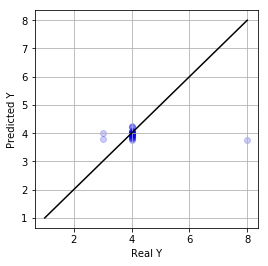

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
y_pred = regressor.predict(x_test)
plt.figure(figsize=(4,4))
plt.scatter(y_test2, y_pred, alpha=0.2, c="blue")
plt.plot([y.min(), y.max()], [y.min(), y.max()], c="black")
plt.grid()
plt.xlabel("Real Y")
plt.ylabel("Predicted Y")
plt.show()

In [61]:
# Check the model (obtained parameters)
print('coefficients: ', regr.coef_)
print('intercept: ', regr.intercept_)

coefficients:  [ 0.04821981 -0.01193039 -0.06941139 ...  0.00472439 -0.01273923
  0.        ]
intercept:  3.982529489408695
